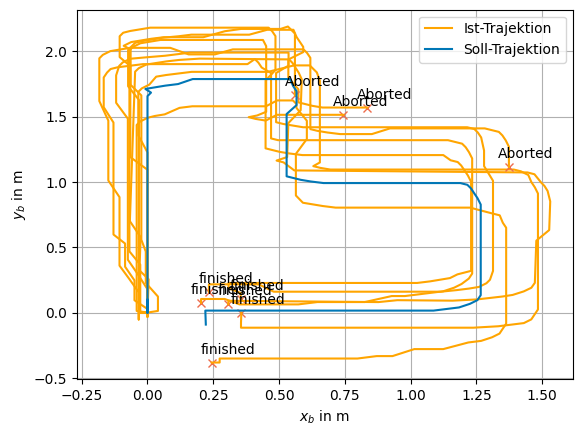

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import os

csv_files = ['RepeatVal50/Exe1.csv', 'RepeatVal50/Exe2.csv', 'RepeatVal50/Exe3.csv', 
             'RepeatVal50/Exe4.csv', 'RepeatVal50/Exe5.csv', 'RepeatVal50/Exe6.csv', 
             'RepeatVal50/Exe7.csv', 'RepeatVal50/Exe8.csv', 'RepeatVal50/Exe9.csv', 
             'RepeatVal50/Exe10.csv', 'BA_Exp2_Trajectory.csv' ]

fig, ax = plt.subplots()
set_retry_label = False;

for csv_file in csv_files:
    # Lade die Daten aus der CSV-Datei
    df = pd.read_csv(csv_file, sep=';')
    
    x = df['xPos'].values
    y = df['yPos'].values

    x_transformed = (x - 50) / 10
    y_transformed = (y - 50) / 10

    
    
    if os.path.basename(csv_file) == 'BA_Exp2_Trajectory.csv':
        ax.plot(x_transformed, y_transformed, c="#0077B6", label="Soll-Trajektion")
    else:
        if len(x_transformed) < 100:
            last_point = (x_transformed[-1], y_transformed[-1])
            ax.text (last_point[0] - 0.04, last_point[1] + 0.07, 'Aborted', color='black') 
            ax.plot(last_point[0], last_point[1], c='#EE6C4D', marker='x')
        else:    
            last_point = (x_transformed[-1], y_transformed[-1])
            ax.text (last_point[0] - 0.04, last_point[1] + 0.07, 'finished', color='black') 
            ax.plot(last_point[0], last_point[1], c='#EE6C4D', marker='x')
              
        if not set_retry_label:
            ax.plot(x_transformed, y_transformed, c="orange", label="Ist-Trajektion")
            set_retry_label = True;
        else:
            ax.plot(x_transformed, y_transformed, c="orange")
        


        
ax.set_xlabel(r'$x_b$ in m')
ax.set_ylabel(r'$y_b$ in m')
ax.legend();
ax.grid(True)

plt.savefig('Exp2_valMit50.pdf', format='pdf')

plt.show()